## Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from collections import Counter

In [20]:
# Load the cleaned dataset
listings = pd.read_csv('../data/cleaned_listings.csv')

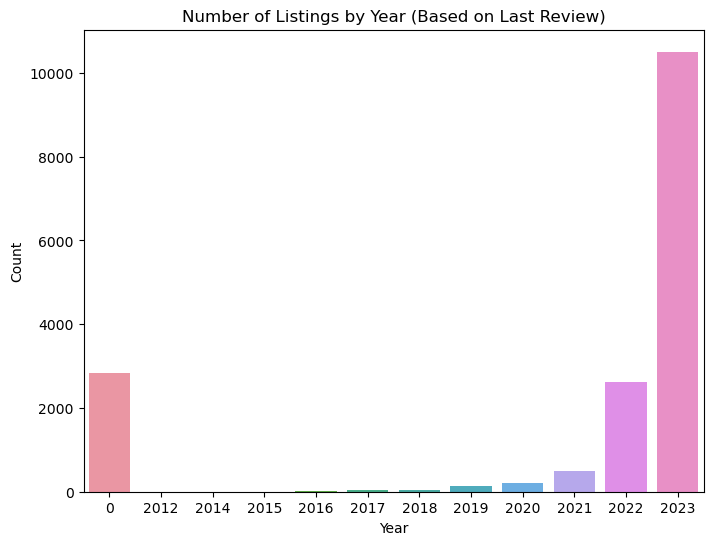

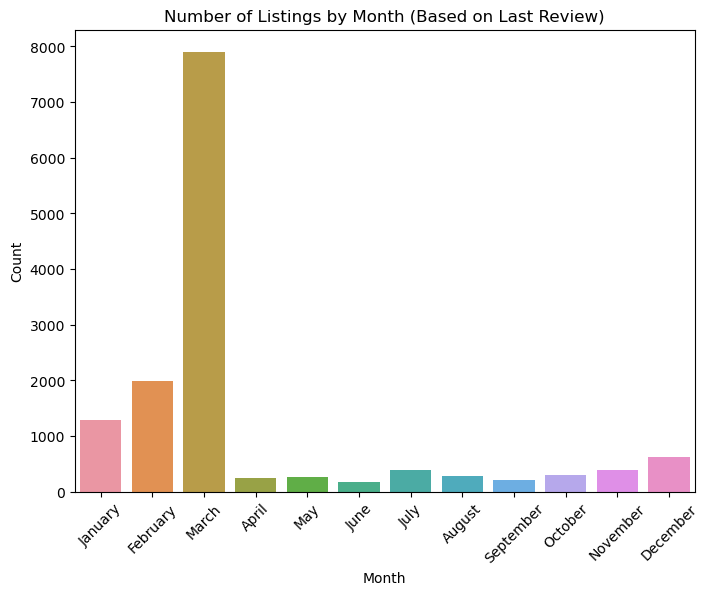

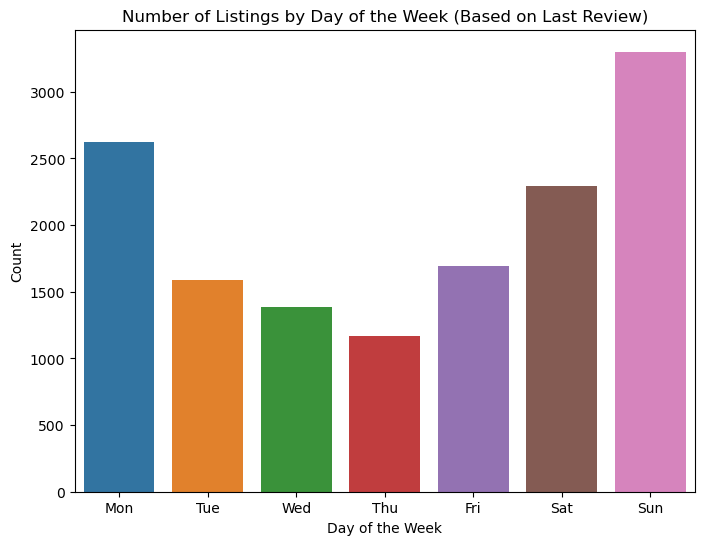

In [46]:
# Convert the 'last_review' column to datetime format
listings_cleaned['last_review'] = pd.to_datetime(listings_cleaned['last_review'])

# Extract year, month, and day of the week as new features
listings_cleaned['year'] = listings_cleaned['last_review'].dt.year
listings_cleaned['month'] = listings_cleaned['last_review'].dt.month
listings_cleaned['day_of_week'] = listings_cleaned['last_review'].dt.dayofweek

# Fill missing values with 0
listings_cleaned['year'].fillna(0, inplace=True)

# Convert the 'year' column to integer type
listings_cleaned['year'] = listings_cleaned['year'].astype(int)

# Plot the counts of listings by year
plt.figure(figsize=(8, 6))
sns.countplot(x='year', data=listings_cleaned)
plt.title('Number of Listings by Year (Based on Last Review)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Plot the counts of listings by month
plt.figure(figsize=(8, 6))
sns.countplot(x='month', data=listings_cleaned)
plt.title('Number of Listings by Month (Based on Last Review)')
plt.xlabel('Month')
plt.ylabel('Count')

# Map month numbers to month names
month_labels = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(ticks=range(12), labels=month_labels, rotation=45)

plt.show()

# Plot the counts of listings by day of the week
plt.figure(figsize=(8, 6))
sns.countplot(x='day_of_week', data=listings_cleaned)
plt.title('Number of Listings by Day of the Week (Based on Last Review)')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


**By extracting the year, month, and day of the week, you can  understand how the listings' characteristics and availability change over different time periods. Based on the bar plots above 

In [65]:
# Example of binning the 'price' column into three categories
bins = [0, 50, 100, np.inf]
labels = ['Low', 'Medium', 'High']
listings_cleaned['price_category'] = pd.cut(listings_cleaned['price'], bins=bins, labels=labels)


**To analyze the prices of listings, we can categorize them into different price ranges. In this code we use binning to divide the prices into three categories: 'Low', 'Medium', and 'High**.
1. Prices less than or equal to 50 are categorized as 'Low'.
2. Prices greater than 50 and less than or equal to 100 are categorized as 'Medium'.
3. Prices greater than 100 are categorized as 'High'.


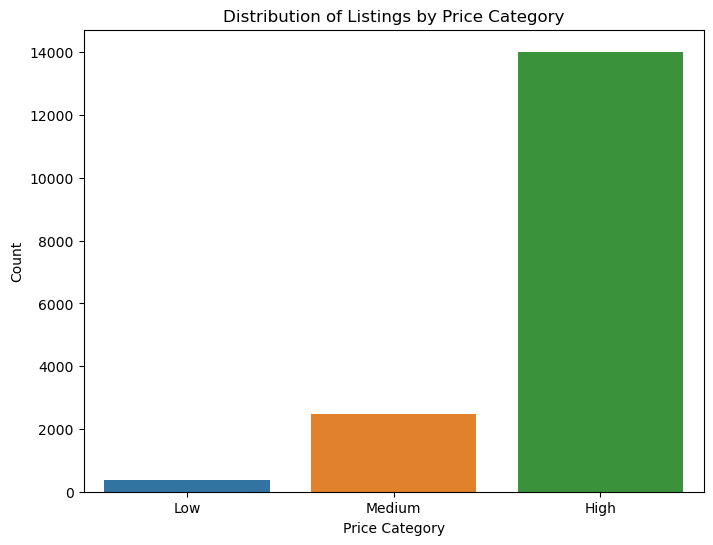

In [68]:
# Calculate the count of listings in each price category
price_category_counts = listings_cleaned['price_category'].value_counts()

# Plot the count of listings by price category
plt.figure(figsize=(8, 6))
sns.barplot(x=price_category_counts.index, y=price_category_counts.values)
plt.title('Distribution of Listings by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()
